Amaan Hassanali (with some help from Sarah Teng & Anika Vaishampayan)
PIC 16A
Homework 8
12/06/2020

I affirm that I personally wrote the text, code, and comments in this homework assignment.

# Homework 8

# Problem 0

This week is the right time for you to be working together with your group to assemble your final project submission. You should have many of the required pieces by now, so your main tasks are to coordinate and agree on how to arrange and present the various required components. There will be no more project time during Discussion sections. 

# Problem 1

Recall the simple random walk.  At each step, we flip a fair coin. If heads, we move "foward" one unit; if tails, we move "backward." 

## Part A

Way back in Homework 1, you wrote some code to simulate a random walk in Python. 

Start with this code, or use posted solutions for HW1. If you have since written random walk code that you prefer, you can use this instead. Regardless, take your code, modify it, and enclose it in a function `rw()`. This function should accept a single argument `n`, the length of the walk. The output should be a list giving the position of the random walker, starting with the position after the first step. For example, 

```python
rw(5)
[1, 2, 3, 2, 3]
```

Unlike in the HW1 problem, you should not use upper or lower bounds. The walk should always run for as long as the user-specified number of steps `n`. 

Use your function to print out the positions of a random walk of length `n = 10`. 

Don't forget a helpful docstring! 

In [1]:
# # solution (with demonstration) here
import random

def rw(n):
    """
    Takes a parameter n - the legnth of a random walk.
    Keeps a log of the positions and steps that take place during the walk.
    Returns a list of positions.
    """
    steps = [] #Empty steps List
    positions = [] #Empty positions list
    p = 0 #Initial position

    while True:
        x = random.choice([-1, 1])
        steps.append(x) #Append current step
        
        p += x
        positions.append(p) #Append current position
        
        #Stop loop when the length of the walk has been reached
        if len(steps) >= n:
            break
    return positions #return positions list

In [2]:
#Testing rw when n = 10
rw(n = 10)

[1, 0, 1, 0, -1, -2, -3, -2, -3, -2]

## Part B

Now create a function called `rw2(n)`, where the argument `n` means the same thing that it did in Part A. Do so using `numpy` tools. Demonstrate your function as above, by creating a random walk of length 10. You can (and should) return your walk as a `numpy` array. 

**Requirements**: 

- No for-loops. 
- This function is simple enough to be implemented as a one-liner of fewer than 80 characters, using lambda notation. Even if you choose not to use lambda notation, the body of your function definition should be no more than three lines long. Importing `numpy` does not count as a line. 
- A docstring is required if and only if you take more than one line to define the function. 

**Hints**:

- Check the documentation for `np.random.choice()`. 
- Discussion 12. 

In [3]:
# solution (with demonstration) here
import numpy as np
def rw2(n):
    """
    Takes a parameter n - the legnth of a random walk.
    Uses numpy tools to generate random steps and positions.
    Returns an array representing a random walk.
    """
    a = np.random.choice([-1, 1], size = n)
    return np.cumsum(a) #Return cumulative sum

In [4]:
#Testing rw2 when n = 10
rw2(10)

array([-1, -2, -1,  0, -1, -2, -3, -2, -1,  0], dtype=int32)

## Part C

Use the `%timeit` magic macro to compare the runtime of `rw()` and `rw2()`. Test how each function does in computing a random walk of length `n = 10000`. 

In [5]:
# time rw()
%timeit rw(10000)

73.6 ms ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
# time rw2()
%timeit rw2(10000)

569 µs ± 124 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Part D

Write a few sentences in which you comment on (a) the performance of each function and (b) the ease of writing and reading each function. 

The function that uses np arrays, rw2(), is clearly faster; it runs nearly 130 times faster. Also, it runs over far more loops when timed. As such, the rw fuction would be more suitable for smaller tasks (i.e. lower values of n) whereas the rw2 function would be more suited for bigger sets of data.

Although the code from the rw2 function is much shorter and seemingly simpler than the rw function when written, writing rw2 requires a little more critical thinking whereas rw is more straightforward. In my opinion, the rw function would be appropriate for beginners/amateurs while the rw2 function seems more appropriate for more professional/higher level programmers.

# Part E

In this problem, we will perform a `d`-dimensional random walk. There are many ways to define such a walk. Here's the definition we'll use for this problem: 

> At each timestep, the walker takes one random step forward or backward **in each of `d` directions.** 

For example, in a two-dimensional walk on a grid, in each timestep the walker would take a step either north or south, and then another step either east or west. Another way to think about is as the walker taking a single "diagonal" step either northeast, southeast, southwest, or northwest. 

Write a function called `rw_d(n,d)` that implements a `d`-dimensional random walk. `n` is again the number of steps that the walker should take, and `d` is the dimension of the walk. The output should be given as a `numpy` array of shape `(n,d)`, where the `k`th row of the array specifies the position of the walker after `k` steps. For example: 

```python
P = rw_d(5, 3)
P
```
```
array([[-1, -1, -1],
       [ 0, -2, -2],
       [-1, -3, -3],
       [-2, -2, -2],
       [-1, -3, -1]])
```

In this example, the third row `P[2,:] = [-1, -3, -3]` gives the position of the walk after 3 steps. 

Demonstrate your function by generating a 3d walk with 5 steps, as shown in the example above. 

All the same requirements and hints from Part B apply in this problem as well. It should be possible to solve this problem by making only a few small modifications to your solution from Part B. If you are finding that this is not possible, you may want to either (a) read the documentation for the relevant `numpy` functions more closely or (b) reconsider your Part B approach. 

In [37]:
# solution (with demonstration) here
def rw_d(n, d):
    return np.cumsum(np.random.choice([-1, 1], (n, d)), axis = 0)

#Testing rw_d when n = 5 and d = 3
P = rw_d(5, 3)
P

array([[ 1, -1, -1],
       [ 0,  0, -2],
       [-1, -1, -3],
       [-2,  0, -2],
       [-1,  1, -3]], dtype=int32)

## Part F

In a few sentences, describe how you would have solved Part E without `numpy` tools. Take a guess as to how many lines it would have taken you to define the appropriate function. Based on your findings in Parts C and D, how would you expect its performance to compare to your `numpy`-based function from Part E? Which approach would your recommend? 

Note: while I obviously prefer the `numpy` approach, it is reasonable and valid to prefer the "vanilla" way instead. Either way, you should be ready to justify your preference on the basis of writeability, readability, and performance. 

For part E, my process would have been as follows:
-- Use for-loop code from part A to generate a position list.
-- Convert the list to an array.
-- Reshape the array appropriately based on the dimension input.

Given what I've seen prior, it seems likely that the numpy-based function would be faster and probably easier to implement. I think my recommendation would largely depend on the expertise and experience of the person taking said recommendation, as well as their situation. However, since numpy is considerably more simple, I would probably suggest it. Of course, using numpy would necessitate some understanding of numpy tools and their manipulation. Otherwise, for beginners or small programs, perhaps the other option would be more desirable; it follows more directly from logic. One may argue otherwise, but consider the following:

If I asked someone to prove 1+1 = 2, here are two potential responses:
One person says I have one thing (eg. a pencil) and another thing, then in total, I have two things. So, 1 and 1 make 2.
VS
Proof. Refer to the Peano axioms. QED.

Obviously, the first method, albeit elementary, still sufficiently justifies that 1 + 1 = 2. However, in conventional arithmetic, one must obviously give a formal proof like the second one. Writing the second proof doesn't seem too complicated either (literally one line), but it necessitates the understanding of the Peano axioms, which subsequently requires an understanding of natural numbers etc. Likewise, using numpy may not be appropriate for the situation (eg. working on a small program) or for the person (eg. beginners). All in all, numpy is great and would ultimately be the go-to method of doing such a program, due to sheer speed and ease of writing the code. Still, as the saying goes, never forget your roots; the other non-numpy method may be slower, but in the end, achieves the same goal and is flows more logically, which makes it easier to interpret in certain scenarious.

## Part G

Generate a 2-dimensional random walk of length 20000. Think of the first column of the output as defining a horizontal coordinate, and the second column as defining a vertical coordinate. Plot the two dimensions on horizontal and vertical axes. You should be able to create some blob-like structures with intriguing shapes. 

You may be interested in looking at several other visualizations of multidimensional random walks [on Wikipedia](https://en.wikipedia.org/wiki/Random_walk). Your result in this part will not look exactly the same, but should look qualitatively fairly similar. 

You only need to show one plot. If you like, you might enjoy playing around with the plot settings. While `ax.plot()` is the normal method to use here, `ax.scatter()` with partially transparent points can also produce some intriguing images. 

Text(0.5, 1.0, 'Scatter')

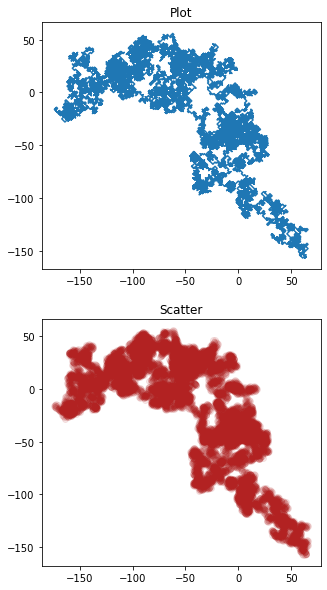

In [8]:
# solution here
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, figsize = (5, 10)) #Two axes, one for plot and one for scatter
LongWalk = rw_d(20000, 2) #Random 2 dimensional walk of length 20,000

#Plot of second column against first column
ax[0].plot(LongWalk[:,0], LongWalk[:,1])
#Scatter plot of second column against first column with different color for aesthetic
ax[1].scatter(LongWalk[:,0], LongWalk[:,1], alpha = 0.1, color = "FireBrick")

#Setting titles based on graph types
ax[0].set_title("Plot")
ax[1].set_title("Scatter")

# NLP Problem

In this problem, you will study the sentiment in a data set of tweets collected during the COVID-19 pandemic. To load the data set, run this block: 

In [9]:
import pandas as pd

def grab_tweets():
    """
    The user supplied these data already split into training and test sets. 
    This function downloads and combines them, returning a single data frame.
    No arguments. 
    """

    url1 = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/Corona_NLP_train.csv"
    url2 = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/Corona_NLP_test.csv"
    
    df1 = pd.read_csv(url1, encoding='iso-8859-1')
    df2 = pd.read_csv(url2, encoding='iso-8859-1')
    
    return pd.concat((df1, df2), axis = 0).reset_index().drop("index", axis = 1)

df = grab_tweets()

Perform a sentiment analysis of this data set. 

Many decisions are up to you. What machine learning method will you choose? How will you treat the `Sentiment` column and turn it into a target variable? Feel free to talk on Campuswire about various possibilities. You are welcome to ask me as well; however, I am likely to respond to questions like "Should I do X?" with answers like "Did you try it? What alternatives did you consider?"

For full credit, you should do the following:  

1. Explore the data set a bit. Figure out what each column means and develop a strategy for how you will use or not use it. Show your steps. 
1. Show that your model can make predictions of sentiment on unseen tweets.
2. Show that your model can produce reasonable-looking lists of strong positive and strongly negative words. 
3. Display three tweets in which your model made a mistake -- e.g. it classified the tweet as positive when in fact it was negative, or vice-versa. 
4. Include liberal comments and surrounding text to explain your steps. If you define any functions, you must also include helpful docstrings. 
5. Most instances of for-loops will be docked a few points. There may be exceptions, but I can't think of any at the moment. Try to do the entire problem with no for-loops at all. 

OPTIONALLY, you may choose to look into the text classification tools in the `nltk` package. In this course, we have mostly treated `nltk` as a convenience tool for accessing certain data sets. However, `nltk` also implements its own versions of a number of highly useful functions for text analysis, including sentiment analysis. Section 1.3 of [this chapter](https://www.nltk.org/book/ch06.html) of the `nltk` manual can help you get started. Using `nltk` for this problem might help you get some better results and learn some nifty tricks, but is not at all required. 

#### Your Solution

In [10]:
# start here, but a good solution will surely require multiple code and markdown text blocks. 

To begin with, we must check the dataframe df in order to better understand the data undergoing sentiment analysis.

In [11]:
#Checking the dataframe df
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
44950,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44951,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44952,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44953,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


The important columns, as identified by myself, are the *Original Tweet* and *Sentiment* (i.e. the predictor and target variables). Going by fundamentals, we need to get the words used in each tweet and analyze how they're used, whether they're positive and ultimately get an idea of what words tend to be used in positive versus negative tweets. To do so, we need to create a term-document matrix, which in turn, requires use the *CountVectorizer* from *sklearn.feature_extraction.text*. The arguments, with the exception of *stop_words*, were chosen arbitrarily based on observations from df above. Because neutral comments aren't necessary for our goals, and working with several types of sentiments makes modelling the data more complicated and by extension, less accurate, all sentiments that were neutral were dropped whereas all extremely positive or extremely negative sentiments were converted to positive and negative respective (it works because extremes are a subset of the normal values, in this case).

In [12]:
#Predictions on unseen tweets
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_df = 0.2, min_df = 30, stop_words = 'english')

counts = vec.fit_transform(df['OriginalTweet']) #Manipulating data from Original Tweet using vec
count_df = pd.DataFrame(counts.toarray(), columns = vec.get_feature_names())
df = pd.concat((df, count_df), axis = 1) #Creating term document matrix

df = df.drop(df[df["Sentiment"] == "Neutral"].index) #Removing Neutral comments
df.loc[df["Sentiment"] == "Extremely Negative", "Sentiment"] = "Negative" #Replacing "Extremely Negative" with "Negative"
df.loc[df["Sentiment"] == "Extremely Positive", "Sentiment"] = "Positive" #Replacing "Extremely Positive" with "Positive"
df.head(5) #Checking top 5 rows of the dataframe

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,00,000,03,10,...,yesterday,yo,york,young,youtube,youâ,yâ,zealand,zero,zombie
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Having 'spiced up' the data for Python, the next barrier is creating training and testing data for the model to work with. However, from these sets of data, unecessary columns were removed.

In [13]:
from sklearn.model_selection import train_test_split
#Splitting into training and testing data
train, test = train_test_split(df, test_size = 0.4)
#Choosing appropriate columns for model to work with:
X_train = train.drop(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment'], axis = 1)
y_train = train['Sentiment']
X_test = test.drop(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment'], axis = 1)
y_test = test['Sentiment']

Now, we need to create an instance of the logistic model to evaluate the data.

In [14]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 250) #Instance of Logistic Regression
LR.fit(X_train, y_train) #Fitting the training data
LR.score(X_train, y_train) #Scoring the training data

0.9097983889318709

However, as usual, the question remains, how do we take care of overfitting? To overcome this challenge, consider the regularization/complexity parameter C and different cv_scores associated with it. We can generate this with a for-loop (#BestLoop) and check for the best scores among these. Unfortunately because of processing and time issues, we only consider multiples of 0.005 in the range, rather than 0.001.

In [15]:
from sklearn.model_selection import cross_val_score
#Finding best parameter C
for C in np.linspace(0.005, 0.05, 10):
    print(str(np.round(C, 4)), end = ": ")
    LR = LogisticRegression(C = C)
    cv_score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
    print(np.round(cv_score, 3))

0.005: 0.742
0.01: 0.773
0.015: 0.789
0.02: 0.799
0.025: 0.805
0.03: 0.81
0.035: 0.813
0.04: 0.816
0.045: 0.819
0.05: 0.82


The best C is C = 0.05 since it has a higher associated cv_score. Now, we fit and score the data with this value of C:

In [16]:
LR = LogisticRegression(C = 0.05) #Best C was C = 0.05 (refer to output above)
LR.fit(X_train, y_train) #Fitting training data
LR.score(X_train, y_train), LR.score(X_test, y_test) #Scoring training and testing data

(0.8630592090292631, 0.8283959044368601)

Values around the 0.8 - 0.9 mark are great. Note: Had the neutral column not been dropped and the extreme columns remained, the scores would be way lower; in particular, the scores would be approximately 0.5. 
To check the words that are most positive and most negative involves getting the coefficients *coef* of the individual words (as a dataframe):

In [24]:
result_df = pd.DataFrame({"Coef" : LR.coef_[0], "Word" : X_train.columns}) #Getting words with their individual coefficients
result_df

,Coef,Word
0,-0.052588,00
1,-0.070310,000
2,-0.011276,03
3,-0.094649,10
4,0.050769,100
...,...,...
3259,-0.101061,youâ
3260,-0.022505,yâ
3261,0.052330,zealand
3262,-0.080517,zero


Checking the most negative words involves simply checking the lowest values of *Coef*.

In [27]:
#Most Negative Words
result_df.sort_values('Coef', ascending = True).head(10)

,Coef,Word
728,-1.973293,crisis
2514,-1.404636,scams
2033,-1.335182,panic
2622,-1.014437,sick
1183,-0.968776,forced
1590,-0.931363,kill
2597,-0.919278,shit
252,-0.912824,bad
1109,-0.893096,fear
826,-0.876214,die


Notice how most of the predicted negative words are actually negative. For instance, you have words such as "panic", "kill", and "die".
Perhaps we need to look on the bright side, or in this case, the opposite side. To check positive words, we need the highest values of *Coef*.

In [26]:
#Most Positive Words
result_df.sort_values('Coef', ascending = False).head(10)

,Coef,Word
1328,1.530907,hand
304,1.473992,best
1201,1.353270,free
1293,1.331955,great
1371,1.327815,help
1275,1.246467,good
2480,1.242480,safe
2834,1.171556,support
2163,1.125908,positive
2907,1.110475,thanks


The predictions again were mostly correct; words such as "safe", "support" and ironically, "positive" were correctly characterized as positive. Doesn't that just make you happy?
Interestingly though, the word "hand" was considered the most positive word, which is peculiar but expected.
The next logical step in this analysis would be to check any mistakes made by the model (i.e. predicting positive when the word is actually negative or predicting negative when the word is actually positive).

In [28]:
#Checking mistakes
y_pred = LR.predict(X_test) #Model's predicted test data

#Identifying mistakes
mistakes = X_test[y_test != y_pred]
mistake_labels = y_test[y_test != y_pred]
mistake_preds = y_pred[y_test != y_pred]

mistake_preds, mistake_labels

(array(['Negative', 'Negative', 'Negative', ..., 'Positive', 'Positive',
        'Positive'], dtype=object),
 42510    Positive
 10151    Positive
 6455     Positive
 18723    Positive
 11733    Negative
            ...   
 41664    Negative
 17732    Positive
 2491     Negative
 1056     Negative
 20470    Negative
 Name: Sentiment, Length: 2514, dtype: object)

Notice how 2526 words were incorrectly categorized by the model. Some of the tweets corresponding to these words are:

In [32]:
#Row 10151
df.loc[10151]["OriginalTweet"]

"In the hour since I posted this, people have contacted me with their sales figures. Some are spectacular. The spike in sales is real.\r\r\n\r\r\nTake heart, everybody. We're in an awful time, but people think wine is important. https://t.co/8nEywszim1"

In [33]:
#Row 18723
df.loc[18723]["OriginalTweet"]

'Whenever I see bare shelves in supermarkets pictures, the family owned supermarket worker in me gets excited about not having to move stock to clean the shelves #coronavirus #supermarkets #retailworkers'

In [36]:
#Row 20470
df.loc[20470]["OriginalTweet"]

'on 2GB last week Peter Dutton threatened the full force of the law on supermarket hoarders but this week when he has some explaining to do about cruise ships infecting the nation he is unavailable instead Border Force must face the music without him'

Having done this, I hope you've taken something important home. If you want to delve further into sentiment analysis, I suggest checking out https://algorithmia.com/blog/using-machine-learning-for-sentiment-analysis-a-deep-dive. This ends our final episode of "HW" on NetF...PIC 16A, and with that, I bid you - our wonderful audience - adieu!